# How to Fit

Use the `powerlaw` library.

In [10]:
import powerlaw
import matplotlib.pyplot as plt

Use the `powerlaw.Fit` object to fit different distributions
into empirical data.
You need to provide a list of observed values that you want to fit a distribution to.

As an example, we use a list of observed degrees of vertices that I obtained in a simulation.

In [11]:
degrees = [28, 2, 11, 2, 16, 9, 9, 16, 7, 8, 12, 6, 5, 9, 7, 3, 2, 17, 13, 17, 19, 9, 4, 3, 3, 16, 3, 5, 24, 11, 9, 16, 11, 9, 6, 6, 5, 1, 1, 12, 1, 6, 5, 8, 48, 6, 6, 12, 4, 2, 1, 9, 12, 29, 14, 38, 3, 6, 2, 6, 13, 1, 40, 29, 13, 2, 22, 1, 2, 7, 3, 3, 3, 13, 20, 8, 3, 1, 20, 2, 16, 6, 7, 11, 23, 14, 8, 2, 2, 5, 6, 13, 12, 16, 17, 2, 11, 5, 22, 2, 2, 14, 5, 8, 5, 6, 17, 2, 7, 3, 3, 3, 5, 1, 17, 20, 45, 14, 17, 31, 8, 20, 7, 23, 5, 6, 1, 3, 9, 7, 10, 5, 6, 10, 2, 22, 3, 5, 11, 8, 1, 10, 1, 4, 1, 21, 2, 3, 17, 33, 1, 5, 10, 6, 14, 3, 21, 10, 7, 6, 2, 33, 3, 2, 37, 17, 2, 2, 5, 2, 8, 13, 7, 37, 7, 3, 2, 2, 2, 2, 8, 1, 4, 7, 2, 3, 22, 4, 12, 26, 24, 6, 17, 3, 7, 4, 1, 18, 24, 9, 7, 2, 25, 1, 4, 1, 2, 1, 10, 8, 1, 6, 4, 2, 1, 3, 8, 19, 6, 12, 1, 1, 8, 3, 9, 1, 2, 3, 10, 1, 1, 1, 9, 14, 2, 8, 1, 8, 1, 14, 3, 1, 12, 4, 3, 1, 4, 6, 7, 1, 1, 4, 1, 8, 5, 1, 7, 9, 2, 5, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1]

fit = powerlaw.Fit(degrees, discrete=True)

Calculating best minimal value for power law fit


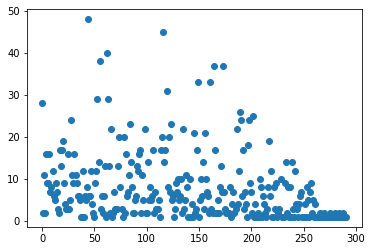

In [12]:
x = [i for i in range(len(degrees))]
plt.scatter(x, degrees)

The `powerlaw.Fit` class basically does the whole job.
Now, in order compare different distributions, we can use
- `fit.power_law`,
- `fit.truncated_power_law`,
- `fit.exponential`,
- etc.

All of the above attributes return a `Distribution` object that represents the corresponding fitted distribution,
which allows you to plot the PDF/CDF/CCDF of the distribution.

`powerlaw.Fit` tries to fit different theoretical distributions starting from some `xmin` value,
so we will need to consider only those empirical values that are `>= fit.xmin`.

In [19]:
from collections import Counter

# Count how many times each degree appears (we only consider `degree >= fit.xmin`).
distribution = Counter([degree for degree in degrees if degree >= fit.xmin])

# Normalize the distribution.
distribution = {x: y / sum(distribution.values()) for x, y in distribution.items()}
distribution

{28: 0.034482758620689655,
 24: 0.10344827586206896,
 48: 0.034482758620689655,
 29: 0.06896551724137931,
 38: 0.034482758620689655,
 40: 0.034482758620689655,
 22: 0.13793103448275862,
 20: 0.13793103448275862,
 23: 0.06896551724137931,
 45: 0.034482758620689655,
 31: 0.034482758620689655,
 21: 0.06896551724137931,
 33: 0.06896551724137931,
 37: 0.06896551724137931,
 26: 0.034482758620689655,
 25: 0.034482758620689655}

<AxesSubplot:>

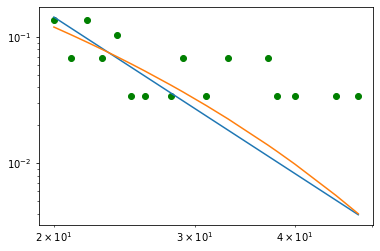

In [15]:
import matplotlib.pyplot as plt
distribution = {x: y / sum(distribution.values()) for x, y in distribution.items()}

# Plot the observed empirical distribution.
plt.scatter(distribution.keys(), distribution.values(), color='g')

# Plot the fitted power-law distribution.
fit.power_law.plot_pdf()
# Plot the fitted power-law distribution with an exponential cutoff.
fit.truncated_power_law.plot_pdf()


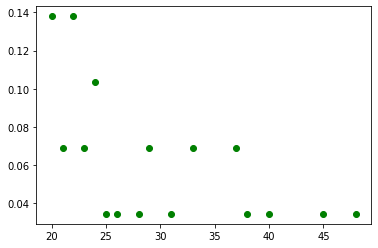

In [18]:
plt.scatter(distribution.keys(), distribution.values(), color='g')